<a href="https://colab.research.google.com/github/Adhamzineldin/Machine_learning_Project/blob/master/Image_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
import numpy as np
from numpy import expand_dims
import pandas as pd
import seaborn as sns
import tensorflow
import keras
import os
import glob
from skimage import io
import skimage
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
import cv2
from keras_preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import math

In [25]:
import pandas as pd
# from google.colab import files
# Raw_Dataset = files.upload()
# testing_Data = files.upload()
# training_Data = files.upload()

#the following is to check the actual training to testing ratio before split.
training_Dataset = pd.read_csv('train.csv')
testing_Dataset = pd.read_csv('test.csv')
train_percentage = len(training_Dataset) / (len(training_Dataset) + len(testing_Dataset))
print(train_percentage)
print(training_Dataset.shape)
print(testing_Dataset.shape)

print(training_Dataset.head())
print(testing_Dataset.head())

0.7999832808537911
(28709, 2)
(7178, 1)
   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                                              pixels
0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1  156 184 198 202 204 207 210 212 213 214 215 21...
2  69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3  205 203 236 157 83 158 120 116 94 86 155 180 2...
4  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


# **Splitting data into training and testing data**

the data used in this model is already split into training and testing data of ratio 0.8, next we'll check what preprocessing steps steps the data needs

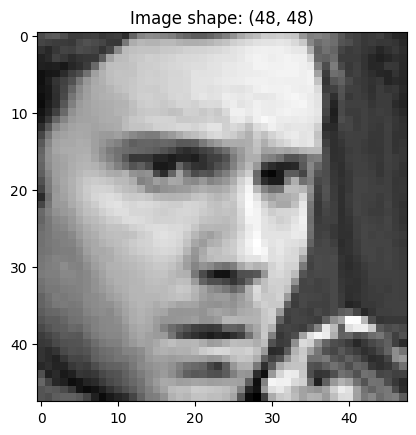

Already grayscale (2D array).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pixels = training_Dataset.loc[0, "pixels"]

plt.imshow(img, cmap='gray')
plt.title(f"Image shape: {img.shape}")
plt.show()

# CHeck if image is grayscaled
if img.ndim == 2:
    print("Already grayscale (2D array).")
elif img.ndim == 3:
    # Check if all channels are equal
    if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):
        print("RGB image, but all channels are equal → grayscale")
    else:
        print("Color image")



As we noticed from the plotted sample, the image is already grayscaled and sized correctly (48 x 48)

next step is to start the preprocessing

In [15]:
#checking for missing images
print(training_Dataset.isnull().sum())
print(testing_Dataset.isnull().sum())

emotion    0
pixels     0
dtype: int64
pixels    0
dtype: int64


In [33]:
#check if normalization is needed
img_array.min(), img_array.max() # (np.float32(11.0), np.float32(210.0)): normalization needed

#split features and target
X_train = training_Dataset.drop('emotion', axis=1)
y_train = training_Dataset['emotion']

#normalization process
# Split the pixel strings into arrays for X_train
X_train_pixels = np.array([np.array(p.split(), dtype='float32') for p in X_train['pixels']])
X_test_pixels = np.array([np.array(p.split(), dtype='float32') for p in testing_Dataset['pixels']])

# Convert labels to integers (m ight be needed l8r)
y_train = np.array(y_train, dtype='int')


X_train_normalized = X_train_pixels / 255.0
X_test_normalized  = X_test_pixels / 255.0

print(X_train_normalized.min(), X_train_normalized.max())


<class 'pandas.core.series.Series'>
0.0 1.0


In [ ]:
#Augmentation
from keras.preprocessing.image import ImageDataGenerator
Data_Generator = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
